# the notebook's order of cells is in parallel with the order of the corresponding paragraphs in the report.

# upload all the datasets available in EDA folder before doing "run all"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#explore average min_temperature of Mseken in the priod 2015-2020 
df=pd.read_csv('/content/min_temperature.csv').dropna()[['DATE','MIN_TEMPERATURE_C']]
df.DATE=pd.to_datetime(df.DATE,dayfirst=True)
df.DATE=df.DATE.dt.month

In [ ]:
df.head()

,DATE,MIN_TEMPERATURE_C
0,1,8.0
1,1,12.0
2,1,12.0
3,1,15.0
4,1,15.0


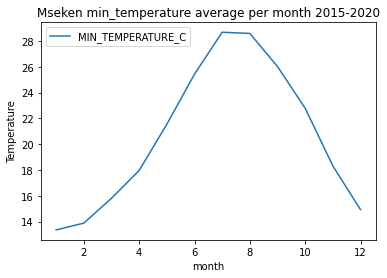

In [ ]:
mean_temperature=df.groupby('DATE').mean().plot(ylabel='Temperature',xlabel='month',
                title='Mseken min_temperature average per month 2015-2020')

In [ ]:
#explore PDL load data

#read the original PDL load of Mseken
data_before_cleaning=pd.read_csv('/content/daily_peaks_complete.csv')
data_before_cleaning.time=pd.to_datetime(data_before_cleaning.time,dayfirst=True)

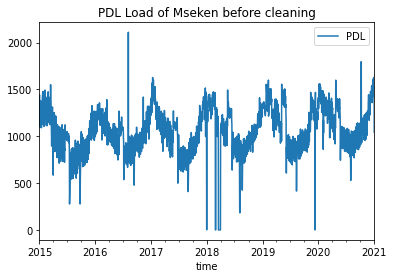

In [ ]:
#plot the original PDL load of Mseken
data_before_cleaning.set_index('time').plot()
plt.title('PDL Load of Mseken before cleaning')
plt.show()

In [ ]:
#i created this dataset in order to do the subplots

dataset=pd.read_csv('/content/clean_daily_peaks_complete_subplot.csv').set_index('time').dropna()

In [ ]:
#every year is in a seperate column, so we have 6 columns each one correpsonds to the PDL load of each year from 2015 to 2020
#i put 2015 in time index just to complete the datetime format "%d%M%Y"
dataset.head()

,2015,2016,2017,2018,2019,2020
time,,,,,,
01/01/2015,1433.0,996.0,1229.0,1124.0,1325.0,1414.0
02/01/2015,1439.0,999.0,1390.0,1360.0,1301.0,1296.0
03/01/2015,1127.0,1060.0,1393.0,1334.0,1312.0,1300.0
04/01/2015,1099.0,1182.0,1351.0,1274.0,1300.0,1361.0
05/01/2015,1288.0,1023.0,1432.0,1279.0,1304.0,1557.0


In [ ]:
dataset.tail()

,2015,2016,2017,2018,2019,2020
time,,,,,,
27/12/2015,959.0,1244.0,1472.000000,1253.0,1237.0,1079.405063
28/12/2015,1220.0,1252.0,1409.000000,1331.0,1210.0,1460.000000
29/12/2015,1257.0,1217.0,1449.000000,1268.0,1178.0,1124.974684
30/12/2015,1242.0,1350.0,950.000000,1206.0,1378.0,1477.000000
31/12/2015,1116.0,1326.0,983.468354,1354.0,1377.0,1551.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 01/01/2015 to 31/12/2015
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2015    365 non-null    float64
 1   2016    365 non-null    float64
 2   2017    365 non-null    float64
 3   2018    365 non-null    float64
 4   2019    365 non-null    float64
 5   2020    365 non-null    float64
dtypes: float64(6)
memory usage: 20.0+ KB


In [ ]:
#the statistics of PDL daily peak load every year 
dataset.describe()

,2015,2016,2017,2018,2019,2020
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1013.017930,1036.495197,1062.198543,1096.797086,1133.560257,1165.926469
std,215.992856,157.465671,221.951323,198.558828,214.047845,194.797289
min,489.000000,478.000000,409.000000,404.000000,415.000000,528.000000
25%,864.000000,935.000000,890.000000,950.000000,963.000000,1023.000000
50%,992.000000,1034.000000,1066.000000,1102.000000,1157.000000,1157.000000
75%,1167.000000,1141.000000,1200.000000,1254.363636,1306.000000,1321.000000
max,1551.000000,1419.000000,1628.000000,1494.000000,1600.000000,1599.000000


<Figure size 3200x1600 with 0 Axes>

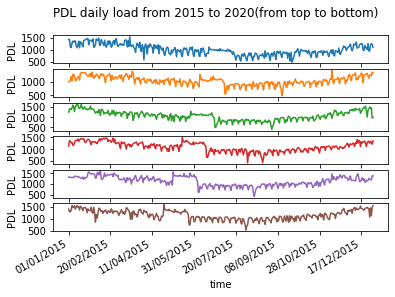

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib.pyplot import figure

#this subplot aims to see the commom patterns that happen every year : peak in winter & ramadan, the translation of 11/12 days of ramadan
#every year, the seasonality is clearer in summer,...(all explained in the report)
figure(figsize=(40, 20), dpi=80)
dataset[['2015','2016','2017','2018','2019','2020']].plot(subplots=True,legend=False,ylabel='PDL',
                                                          title='PDL daily load from 2015 to 2020(from top to bottom)')

plt.figure()
plt.show()

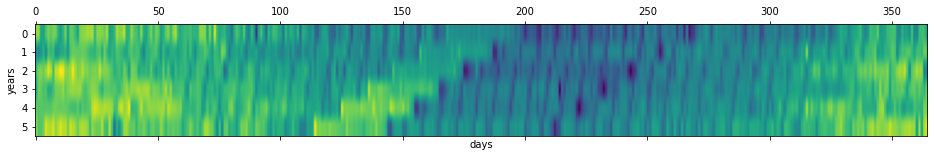

In [ ]:
#the warmer is the color(yellow) the higher is the PDL value --> highest values are in winter and ramadan (the translation of ramadan
#is clear also in this plot) 
dataset=dataset.T
plt.matshow(dataset, interpolation=None, aspect='auto')
plt.xlabel('days')
plt.ylabel('years')
plt.show()

In [ ]:
data_after_cleaning=pd.read_csv('/content/clean_daily_peaks_complete.csv')
data_after_cleaning.time=pd.to_datetime(data_after_cleaning.time,dayfirst=True)

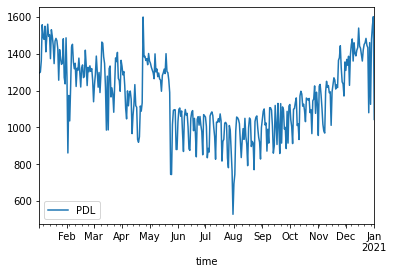

In [ ]:
#ZOOM on 2020 data
data_after_cleaning[-366:].set_index('time').plot()

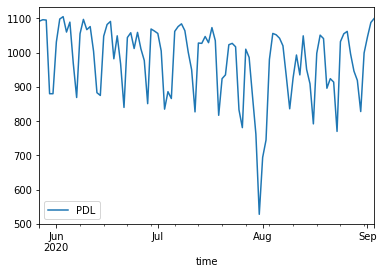

In [ ]:
#ZOOM on summer 2020
data_after_cleaning[-220:-120].set_index('time').plot()

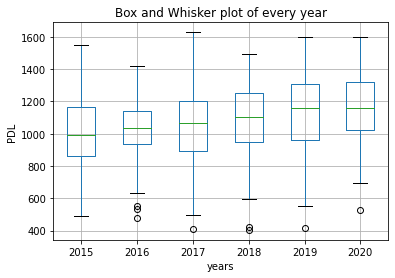

In [ ]:
#box&whisker plot to visualize the statistics of PDL load every year
dataset=dataset.T
dataset.boxplot()
plt.xlabel('years')
plt.ylabel('PDL')
plt.title('Box and Whisker plot of every year')
plt.show()

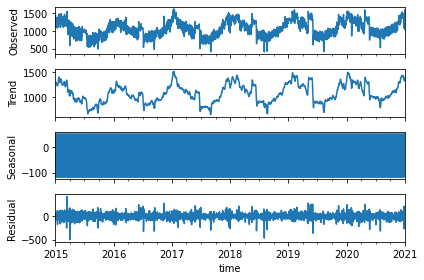

In [ ]:
#PDL load data decomposition
df=data_after_cleaning.set_index('time')
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()
#the weekly seasonality is not visible because of high number of weeks 

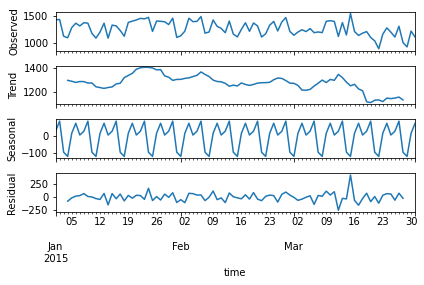

In [ ]:
#decomposition of PDL load of first 90 days in order to see the weekly seasonality
df_zoom=df[:90]
df_zoom.index=pd.to_datetime(df_zoom.index,dayfirst=True)
result = seasonal_decompose(df_zoom, model='additive')
result.plot()
plt.show()


# check PDL load data normality

In [ ]:
df=pd.read_csv('/content/clean_daily_peaks_complete.csv')
shapiro_test = stats.shapiro(df.PDL)
print('shapiro test statistic: '+str(shapiro_test[0]))
print('shapiro test p-value: '+str(shapiro_test[1]))

shapiro test statistic: 0.9944982528686523
shapiro test p-value: 2.8526602591227856e-07


**p-value <<0.05, then data is not normal. Therefore we use MinMaxscaler for data scaling instead of Standardize**

# test data stationarity

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['PDL'])

ADF Test Statistic : -3.857129350851698
p-value : 0.0023740115562261607
#Lags Used : 22
Number of Observations Used : 2170
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


https://machinelearningmastery.com/time-series-data-stationary-python/

In [ ]:

print('pvalue: '+str(adfuller(df.PDL)[1]))
print('test statistic: '+str(adfuller(df.PDL)[0]))#the more negative the test statistic the more likely to be stationary is the data
print('Critical Values:')
for key, value in adfuller(df.PDL)[4].items():
	print('\t%s: %.3f' % (key, value))
#our test statistic is less than the value at 1%, this suggests that the probability that our test result is a fluke is low.

pvalue: 0.0023740115562261607
test statistic: -3.857129350851698
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
